Epoch 1/100
1032/1032 [==============================] - 2s 1ms/step - loss: 3.5939 - mse: 3.5939
Epoch 2/100
1032/1032 [==============================] - 1s 1ms/step - loss: 1.3719 - mse: 1.3719
Epoch 3/100
1032/1032 [==============================] - 1s 1ms/step - loss: 0.7071 - mse: 0.7071
Epoch 4/100
1032/1032 [==============================] - 1s 1ms/step - loss: 0.5723 - mse: 0.5723
Epoch 5/100
1032/1032 [==============================] - 1s 1ms/step - loss: 0.5447 - mse: 0.5447
Epoch 6/100
1032/1032 [==============================] - 1s 1ms/step - loss: 0.5332 - mse: 0.5332
Epoch 7/100
1032/1032 [==============================] - 1s 1ms/step - loss: 0.5266 - mse: 0.5266
Epoch 8/100
1032/1032 [==============================] - 1s 1ms/step - loss: 0.5237 - mse: 0.5237
Epoch 9/100
1032/1032 [==============================] - 1s 1ms/step - loss: 0.5216 - mse: 0.5216
Epoch 10/100
1032/1032 [==============================] - 1s 1ms/step - loss: 0.5207 - mse: 0.5207
Epoch 11/100
1032/1

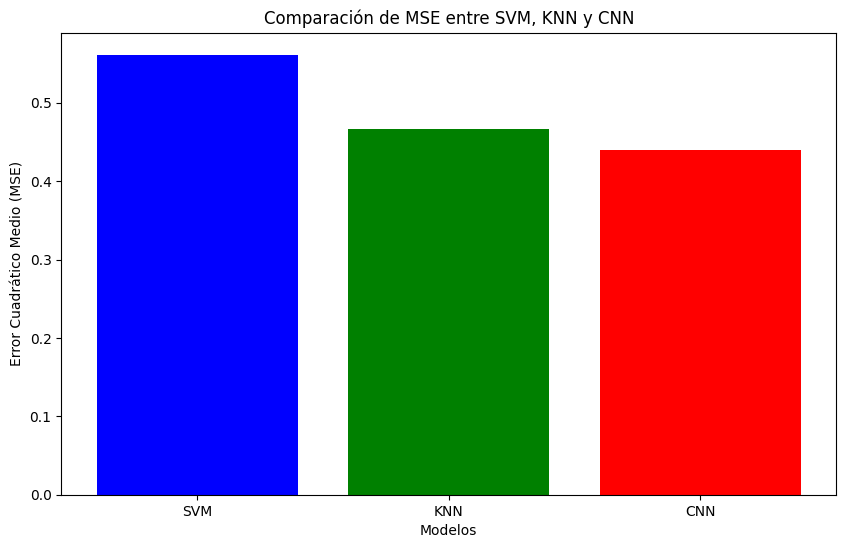

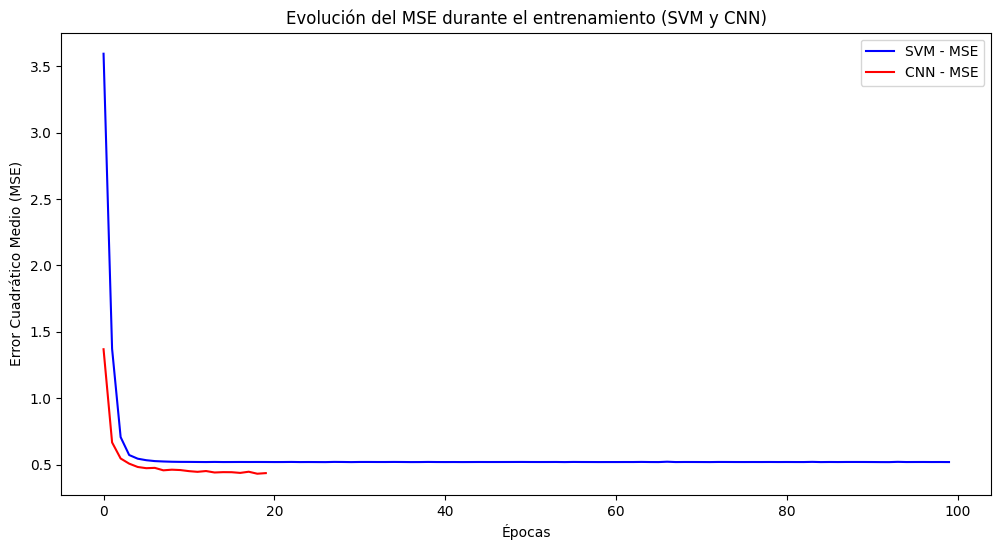

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras import layers, models

# Cargar el dataset California Housing
data = fetch_california_housing()
X = data.data
y = data.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Comparar SVM, KNN y CNN para un problema de regresión

# --- Modelo SVM ---
class SVMLayer(layers.Layer):
    def __init__(self, units=1):
        super(SVMLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

# Crear el modelo SVM
svm_model = models.Sequential()
svm_model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
svm_model.add(SVMLayer(units=1))

# Definir la función de pérdida para regresión (error cuadrático medio)
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Compilar el modelo
svm_model.compile(optimizer='adam', loss=mse_loss, metrics=['mse'])

# Entrenar el modelo SVM
history_svm = svm_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Evaluar el modelo SVM
svm_loss, svm_mse = svm_model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba (SVM): {svm_loss}')
print(f'Error cuadrático medio en el conjunto de prueba (SVM): {svm_mse}')

# --- Modelo KNN ---
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluar el modelo KNN
y_pred_knn = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, y_pred_knn)
print(f'Error cuadrático medio en el conjunto de prueba (KNN): {knn_mse}')

# --- Modelo CNN ---
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

cnn_model = models.Sequential()
cnn_model.add(layers.InputLayer(input_shape=(X_train.shape[1], 1)))
cnn_model.add(layers.Conv1D(16, 3, activation='relu'))
cnn_model.add(layers.MaxPooling1D(2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(1))

# Compilar el modelo CNN
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Entrenar el modelo CNN
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=16, verbose=1)

# Evaluar el modelo CNN
cnn_loss, cnn_mse = cnn_model.evaluate(X_test_cnn, y_test)
print(f'Pérdida en el conjunto de prueba (CNN): {cnn_loss}')
print(f'Error cuadrático medio en el conjunto de prueba (CNN): {cnn_mse}')

# Graficar los resultados finales de MSE
models = ['SVM', 'KNN', 'CNN']
mse_values = [svm_mse, knn_mse, cnn_mse]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.xlabel('Modelos')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Comparación de MSE entre SVM, KNN y CNN')
plt.show()

# Graficar la evolución de la pérdida durante el entrenamiento para SVM y CNN
plt.figure(figsize=(12, 6))
plt.plot(history_svm.history['mse'], label='SVM - MSE', color='blue')
plt.plot(history_cnn.history['mse'], label='CNN - MSE', color='red')
plt.xlabel('Épocas')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Evolución del MSE durante el entrenamiento (SVM y CNN)')
plt.legend()
plt.show()